In [32]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [30]:
import seaborn as sns
import matplotlib.pyplot as pl
def plot_confusion(TN, FP, FN, TP, title):
    confusion_mat = [[TN, FN], [FP, TP]]
    ax = sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title("Confusion Matrix \n" + title)
    ax.set_xticklabels(['No Fraud', 'Fraud'])
    ax.set_yticklabels(['No Fraud', 'Fraud'])
    return plt.show()

In [31]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

def display_scores(Y, yhat):
    print('Accuracy Score : ' + str(accuracy_score(Y, yhat)))
    print('Precision Score : ' + str(precision_score(Y, yhat)))
    print('Recall Score : ' + str(recall_score(Y, yhat)))
    print('F1 Score : ' + str(f1_score(Y, yhat)))

In [3]:
dfcc = pd.read_csv('C:/Users/Damien/Desktop/Aquis/Resources/creditcardfraud_normalised.csv')

In [4]:
X = dfcc.drop('class', axis=1)
Y = dfcc['class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=404)

In [6]:
xgb = XGBClassifier(random_state=1, verbosity=0)

In [7]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6]
        }

In [8]:
folds = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 404)

In [9]:
grid = GridSearchCV(estimator = xgb,
                    param_grid = params,
                    scoring = 'f1',
                    cv=skf.split(X_train,y_train),
                   verbose = 3)

In [10]:
grid.fit(X_train,y_train)
print('Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_)
print('\n Best parameters:')
print(grid.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8, score=0.833, total=   6.9s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8, score=0.763, total=   7.2s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.0s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8, score=0.899, total=   7.6s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8, score=0.882, total=   7.5s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8, score=0.836, total=   7.5s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=1.0, score=0.840, total=   6.5s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=1.0, score=0.783, total=   6.5s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=0.8, score=0.846, total=   8.1s
[CV] colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0, score=0.850, total=   7.3s
[CV] colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0, score=0.803, total=   7.0s
[CV] colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0, score=0.899, total=   7.3s
[CV] colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0, score=0.884, total=   7.0s
[CV] colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, score=0.767, total=   6.4s
[CV] colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, score=0.892, total=   6.6s
[CV] colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, score=0.892, total=   6.6s
[CV] colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, score=0.823, total=   6.8s
[CV] colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, score=0.824, total=  10.4s
[CV] colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsamp

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.892, total=   6.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.836, total=   6.7s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.814, total=   7.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.793, total=   6.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.884, total=   6.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.836, total=   7.5s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.836, total=   7.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.783, total=   6.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.877, total=   7.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.862, total=   6.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsam

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8, score=0.826, total=  10.7s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8, score=0.803, total=  10.7s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8, score=0.891, total=  11.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8, score=0.884, total=  10.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8, score=0.824, total=  11.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0 


[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8, score=0.884, total=   7.0s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8, score=0.868, total=   6.9s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8, score=0.846, total=   7.0s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0, score=0.833, total=   5.8s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0, score=0.793, total=   5.7s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.813, total=   7.0s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.847, total=   6.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.777, total=   5.9s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.885, total=   6.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.884, total=   6.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  cols

[CV]  colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, score=0.763, total=  10.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, score=0.873, total=  11.0s
[CV] colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, score=0.892, total=  10.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, score=0.836, total=  10.8s
[CV] colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, score=0.817, total=   8.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=5, subsample=1.0, score=0.868, total=   7.6s
[CV] colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=5, subsample=1.0, score=0.832, total=   7.4s
[CV] colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8, score=0.824, total=   7.1s
[CV] colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8, score=0.823, total=   6.8s
[CV] colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8, score=0.892, total=   7.1s
[CV] colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsamp

[CV]  colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8, score=0.807, total=  10.9s
[CV] colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8, score=0.793, total=  11.5s
[CV] colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8, score=0.891, total=  11.4s
[CV] colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8, score=0.873, total=  10.6s
[CV] colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8, score=0.855, total=  10.3s
[CV] colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, score=0.885, total=   9.5s
[CV] colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, score=0.877, total=   9.1s
[CV] colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, score=0.846, total=   9.2s
[CV] colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, score=0.824, total=   8.2s
[CV] colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, score=0.787, total=   8.6s
[CV] colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.829, total=   6.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.817, total=   6.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.793, total=   6.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.899, total=   6.0s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.872, total=   6.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsa

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.821, total=  10.9s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.793, total=  11.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.899, total=  11.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.884, total=  11.5s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.846, total=  11.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, score=0.770, total=   9.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, score=0.899, total=   9.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, score=0.875, total=   9.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, score=0.836, total=   9.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, score=0.833, total=   7.7s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.

[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=1.0, score=0.864, total=   5.9s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=1.0, score=0.836, total=   5.4s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.826, total=   9.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.793, total=   9.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.884, total=   9.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_b

[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=0.824, total=   8.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=0.793, total=   8.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=0.879, total=   8.8s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=0.864, total=   8.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=0.839, total=   8.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8, score=0.892, total=   7.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8, score=0.866, total=   7.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8, score=0.826, total=   7.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, score=0.840, total=   6.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, score=0.793, total=   6.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0 
[CV]  cols

[CV]  colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=0.8, score=0.855, total=  11.0s
[CV] colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0, score=0.800, total=  10.4s
[CV] colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0, score=0.790, total=  10.3s
[CV] colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0, score=0.885, total=  10.9s
[CV] colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0, score=0.870, total=  10.2s
[CV] colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0, score=0.793, total=   9.2s
[CV] colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0, score=0.899, total=   9.8s
[CV] colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0, score=0.882, total=   9.5s
[CV] colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0, score=0.826, total=   9.3s
[CV] colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.8, score=0.800, total=   8.1s
[CV] colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_b

[CV]  colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, score=0.872, total=   8.3s
[CV] colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, score=0.820, total=   7.9s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.810, total=   9.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.783, total=   9.4s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.899, total=   9.5s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.836, total=  10.0s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.824, total=   8.9s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.777, total=   8.9s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.885, total=   9.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.866, total=   9.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 


[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.824, total=   8.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.784, total=   8.0s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.879, total=   8.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.870, total=   8.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.846, total=   7.8s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsa

[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=0.773, total=   9.7s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=0.899, total=   9.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=0.868, total=   9.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=0.860, total=   9.6s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.810, total=   8.9s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=0.8, score=0.866, total=   9.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=0.8, score=0.848, total=   9.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=0.817, total=   9.1s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=0.797, total=   9.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=0.884, total=   9.4s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=0.824, total=   8.3s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=0.783, total=   8.3s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=0.908, total=   8.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=0.864, total=   8.7s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=0.836, total=   8.6s
[CV] colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsa

[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 154.0min finished


Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=0)

 Best score:
0.859840082644628

 Best parameters:
{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.8}


In [23]:
grid = GridSearchCV(estimator = xgb,
                    param_grid = params,
                    scoring = 'precision',
                    cv=skf.split(X_train,y_train),
                   verbose = 3)

In [ ]:
start_time = time.time()
y_pred = grid.predict(X_test)
end_time = time.time()
print('Execution time for prediction:' + str(end_time - start_time))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
plot_confusion(tn,fp,fn,tp, title='XGBoost (Dev set)')
print('Model on Development Set \n')
display_scores(y_test, y_pred)

In [ ]:
start_time = time.time()
yhat=grid.predict(X)
end_time = time.time()
print('Execution time for prediction:' + str(end_time - start_time))

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y, yhat).ravel()
plot_confusion(tn,fp,fn,tp, title='XGBoost (All data)')
print('Model on all data \n')
display_scores(Y, yhat)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
plot_confusion(tn,fp,fn,tp, title='XGBoost (Dev set)')

In [ ]:
yhat = grid.predict(X)
tn, fp, fn, tp = confusion_matrix(Y, yhat).ravel()
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Accuracy Score : ' + str(accuracy_score(Y, yhat)))
print('Precision Score : ' + str(precision_score(Y, yhat)))
print('Recall Score : ' + str(recall_score(Y, yhat)))
print('F1 Score : ' + str(f1_score(Y, yhat)))
plot_confusion(tn,fp,fn,tp, title='XGBoost (All data)')

## Optimize for Precision

In [24]:
grid.fit(X_train,y_train)
print('Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_)
print('\n Best parameters:')
print(grid.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8, score=0.962, total=   6.8s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8, score=0.900, total=   6.7s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.4s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8, score=0.951, total=   7.0s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8, score=0.949, total=   8.3s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=0.8, score=0.927, total=   8.0s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=1.0, score=0.980, total=   6.7s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=1.0, score=0.904, total=   6.7s
[CV] colsample_bytree=0.6, gamma=0, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=0.8, score=0.929, total=   8.1s
[CV] colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0, score=0.981, total=   7.3s
[CV] colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0, score=0.907, total=   6.7s
[CV] colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0, score=0.951, total=   7.5s
[CV] colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0, score=0.934, total=   7.1s
[CV] colsample_bytree=0.6, gamma=0, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, score=0.885, total=   6.5s
[CV] colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, score=0.935, total=   7.1s
[CV] colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, score=0.935, total=   6.8s
[CV] colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=5, min_child_weight=10, subsample=1.0, score=0.895, total=   6.8s
[CV] colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8, score=0.961, total=  10.6s
[CV] colsample_bytree=0.6, gamma=0, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsamp

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.935, total=   7.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=1, subsample=1.0, score=0.927, total=   6.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.960, total=   7.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.906, total=   6.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8, score=0.934, total=   7.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, min_child_weight=5, subsample=0.8 


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=5, subsample=1.0, score=0.927, total=   7.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.944, total=   7.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.904, total=   6.8s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.919, total=   7.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsample=0.8, score=0.903, total=   6.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=4, min_child_weight=10, subsam

[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8, score=0.943, total=  11.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8, score=0.907, total=  11.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8, score=0.950, total=  11.6s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8, score=0.934, total=  11.2s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=0.8, score=0.942, total=  11.1s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=6, min_child_weight=1, subsample=1.0 


[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8, score=0.934, total=   6.5s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8, score=0.918, total=   6.5s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=0.8, score=0.929, total=   6.6s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0, score=0.962, total=   5.5s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0, score=0.906, total=   5.5s
[CV] colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.8, score=0.893, total=   6.7s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=1.000, total=   5.9s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.887, total=   5.6s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.921, total=   6.0s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0, score=0.934, total=   5.7s
[CV] colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=1.0 
[CV]  cols

[CV]  colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, score=0.900, total=  10.4s
[CV] colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, score=0.948, total=  10.6s
[CV] colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, score=0.935, total=  10.2s
[CV] colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=1, subsample=1.0, score=0.927, total=  10.3s
[CV] colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8, score=0.942, total=   8.1s
[CV] colsample_bytree=0.6, gamma=1, max_depth=6, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=5, subsample=1.0, score=0.918, total=   6.4s
[CV] colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=5, subsample=1.0, score=0.897, total=   6.3s
[CV] colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8, score=0.961, total=   6.4s
[CV] colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8, score=0.911, total=   6.4s
[CV] colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8, score=0.935, total=   6.7s
[CV] colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=10, subsample=0.8 
[CV]  colsamp

[CV]  colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8, score=0.941, total=  10.9s
[CV] colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8, score=0.906, total=  10.8s
[CV] colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8, score=0.950, total=  11.0s
[CV] colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8, score=0.948, total=  10.7s
[CV] colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=0.8, score=0.930, total=  10.7s
[CV] colsample_bytree=0.8, gamma=0, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, score=0.921, total=   9.1s
[CV] colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, score=0.919, total=   9.1s
[CV] colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=0.8, score=0.929, total=   9.0s
[CV] colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, score=0.961, total=   8.1s
[CV] colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0, score=0.889, total=   8.3s
[CV] colsample_bytree=0.8, gamma=0, max_depth=6, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=0.8, score=0.911, total=   6.5s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.942, total=   5.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.906, total=   5.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.951, total=   5.8s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsample=1.0, score=0.892, total=   5.5s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=3, min_child_weight=10, subsa

[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.980, total=  10.0s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.906, total=  10.5s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.951, total=  10.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.934, total=  10.4s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=1, subsample=1.0, score=0.929, total=  10.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=5, subsample=0.8 


[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, score=0.870, total=   8.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, score=0.951, total=   8.5s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, score=0.933, total=   8.2s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=5, subsample=1.0, score=0.927, total=   8.3s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.8, score=0.962, total=   7.1s
[CV] colsample_bytree=0.8, gamma=0.5, max_depth=6, min_child_weight=10, subsample=0.

[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=1.0, score=0.891, total=   5.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=3, min_child_weight=10, subsample=1.0, score=0.927, total=   5.5s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.943, total=   9.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.906, total=   9.6s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8, score=0.934, total=   9.9s
[CV] colsample_bytree=0.8, gamma=1, max_depth=4, min_child_weight=1, subsample=0.8 
[CV]  colsample_b

[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=0.961, total=   8.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=0.906, total=   8.3s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=0.906, total=   8.8s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=0.891, total=   8.4s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=0.8, score=0.912, total=   8.7s
[CV] colsample_bytree=0.8, gamma=1, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8, score=0.935, total=   8.0s
[CV] colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8, score=0.932, total=   7.9s
[CV] colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=0.8, score=0.926, total=   7.8s
[CV] colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, score=0.980, total=   7.4s
[CV] colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0, score=0.906, total=   7.2s
[CV] colsample_bytree=0.8, gamma=1, max_depth=6, min_child_weight=10, subsample=1.0 
[CV]  cols

[CV]  colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=0.8, score=0.930, total=  12.1s
[CV] colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0, score=0.923, total=  11.3s
[CV] colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0, score=0.922, total=  11.0s
[CV] colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0, score=0.921, total=  11.2s
[CV] colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0, score=0.905, total=  11.5s
[CV] colsample_bytree=1.0, gamma=0, max_depth=4, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0, score=0.906, total=  10.1s
[CV] colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0, score=0.951, total=  10.8s
[CV] colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0, score=0.949, total=  10.6s
[CV] colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=5, subsample=1.0, score=0.926, total=  10.5s
[CV] colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.8, score=0.923, total=   9.0s
[CV] colsample_bytree=1.0, gamma=0, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_b

[CV]  colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, score=0.892, total=   9.1s
[CV] colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=0, max_depth=6, min_child_weight=10, subsample=1.0, score=0.909, total=   9.0s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.925, total=  10.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.904, total=  10.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8, score=0.951, total=  10.0s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=3, min_child_weight=1, subsample=0.8 
[CV

[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=1, subsample=1.0, score=0.927, total=  11.1s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.961, total=  10.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.887, total=  10.0s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.921, total=  10.2s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8, score=0.932, total=  10.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=4, min_child_weight=5, subsample=0.8 


[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.961, total=   9.4s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.860, total=   8.8s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.906, total=   9.3s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.905, total=   9.0s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8, score=0.929, total=   9.0s
[CV] colsample_bytree=1.0, gamma=0.5, max_depth=5, min_child_weight=10, subsa

[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=0.902, total=   9.8s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=0.951, total=  10.0s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=0.918, total=   9.7s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=0.8, score=0.963, total=  10.0s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0, score=0.925, total=   9.1s
[CV] colsample_bytree=1.0, gamma=1, max_depth=3, min_child_weight=1, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=0.8, score=0.932, total=  13.3s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=0.8 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=0.8, score=0.914, total=  13.0s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=0.942, total=  13.1s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=0.940, total=  13.0s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0, score=0.934, total=  12.9s
[CV] colsample_bytree=1.0, gamma=1, max_depth=4, min_child_weight=5, subsample=1.0 
[CV]  colsample_bytr

[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=0.961, total=  11.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=0.904, total=  11.7s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=0.952, total=  12.5s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=0.891, total=  12.2s
[CV] colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0 
[CV]  colsample_bytree=1.0, gamma=1, max_depth=5, min_child_weight=10, subsample=1.0, score=0.927, total=  12.6s
[CV] colsample_bytree=1.0, gamma=1, max_depth=6, min_child_weight=1, subsample=0.8 
[CV]  colsa

[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 162.1min finished


Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=0)

 Best score:
0.9463951599990852

 Best parameters:
{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}


In [11]:
xgb_params = grid.best_params_
xgb_score = grid.best_score_
xgb_estimator = grid.best_estimator_

In [26]:
y_pred = grid.predict(X_test)

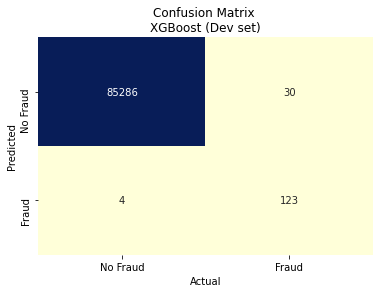

Model on Development Set 

Accuracy Score : 0.999602073897218
Precision Score : 0.968503937007874
Recall Score : 0.803921568627451
F1 Score : 0.8785714285714286


In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
plot_confusion(tn,fp,fn,tp, title='XGBoost (Dev set)')
print('Model on Development Set \n')
display_scores(y_test, y_pred)

In [34]:
start_time = time.time()
yhat=grid.predict(X)
end_time = time.time()
print('Execution time for prediction:' + str(end_time - start_time))

Execution time for prediction:0.20844054222106934


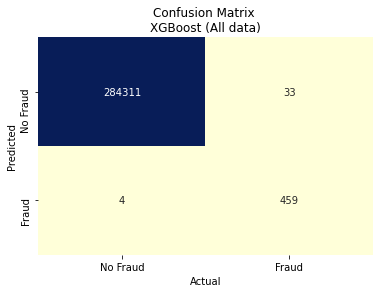

Model on all data 

Accuracy Score : 0.999870087462738
Precision Score : 0.9913606911447084
Recall Score : 0.9329268292682927
F1 Score : 0.9612565445026178


In [35]:
tn, fp, fn, tp = confusion_matrix(Y, yhat).ravel()
plot_confusion(tn,fp,fn,tp, title='XGBoost (All data)')
print('Model on all data \n')
display_scores(Y, yhat)

In [38]:
xgb_estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [39]:
xgb_params

{'colsample_bytree': 1.0,
 'gamma': 1,
 'max_depth': 4,
 'min_child_weight': 1,
 'subsample': 0.8}